In [36]:

import bisect
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



class KMeans():
    """
    This class performs K-means clustering on the input data points.
    """
    def __init__(self,k,X,y,p=2, n_iter=100, kmeanspp=False):
        """
        Initialize the KMeans class.
        
        Parameters:
        k (int): Number of clusters
        X (numpy.ndarray): Input data points
        y (numpy.ndarray): Labels of the input data points
        p (int): Minkowski p-norm for distance calculation
        n_iter (int): Maximum number of iterations for the K-means algorithm
        kmeanspp (bool): Flag to enable K-means++ initialization.

        Output: None

        """
        
        self.X=X
        self.y=y
        self.k=k
        self.p=p
        self.n_iter=n_iter
        self.kmeanspp=kmeanspp
        if self.kmeanspp:
            self.kmeansplusplus()
        else:
            
            np.random.seed(0)
            self.centroids=np.random.randint(0, len(self.X),k)
            self.centroids=self.X[self.centroids]
    
    

    def kmeansplusplus(self):
        """
        Initializes centroids using the kmeansplusplus method.

        Parameters: None
        Output: None
        
        """
        self.centroids=[]
        first_centroid=np.random.randint(0, len(self.X))


        self.centroids.append(self.X[first_centroid])

        distances=np.array([0]*len(self.X))
        for iter in range(1,self.k):
            for indx in range(len(self.X)):
                _,distances[indx]=self.distance_centroid(indx)
                distances[indx]=distances[indx]**2

            distances=distances/np.sum(distances)
            distances=np.cumsum(distances)
            random=np.random.uniform(0,1)
            index=bisect.bisect_left(distances,random)
            self.centroids.append(self.X[index])

       
    def calculate_distance(self, indx,c):
        """ 
        Calculate the distance between a data point and a centroid.
        Parameters: 
        indx (int): Index of the data point
        c (numpy.ndarray): Coordinates of the centroid

        Output: float: Distance between the data point and the centroid
        
        """
        return (np.sum((self.X[indx]-c)**self.p))**1/self.p
    
    def distance_centroid(self, indx):
        """
        Calculate the distance between a data point and a centroid.

        Parameters:
        indx (int): Index of the data point

        Output: float: New Centroid, Minimum distance between the data point and the centroid
        """
        d_min=float('inf')
        new_centroid=0
        for c_no,c in enumerate(self.centroids):
            
                d=self.calculate_distance(indx,c)
                
                if d<d_min:
                    d_min=d
                    new_centroid=c_no
        
        return new_centroid,d_min
    
    def recalculate_centroid(self,clusters):
        """
        Recalculate the centroids based on the assigned clusters.
        
        Parameters:
        clusters (numpy.ndarray): Cluster assignments of the data points
        
        Output: None
        """

        
        
        for c_no,c in enumerate(self.centroids):
            
            self.centroids[c_no]=np.mean(self.X[np.where(clusters==c_no)],axis=0)

        



    def kmeans(self):
        """
        main function to perform K-means clustering.

        Parameters: None
        Output: numpy.ndarray: Cluster assignments of the data points after K-means clustering
        """
        
        
        clusters=np.array([0]*len(self.X))
        prev_cl=[0]*len(self.X)
        for _ in range(self.n_iter):
            for indx,_ in enumerate(self.X):
                
                clusters[indx],_=self.distance_centroid(indx)

            if (np.array(prev_cl)==np.array(clusters)).all():
                return clusters

            prev_cl=clusters
            self.recalculate_centroid(clusters)

                

        return clusters








In [52]:

data=make_blobs(500,centers=3,n_features=2)
X=data[0]
y=data[1]


k=3
kmpp=KMeans(k,X,y,p=2, n_iter=100,kmeanspp=True)
y_pred=kmpp.kmeans()


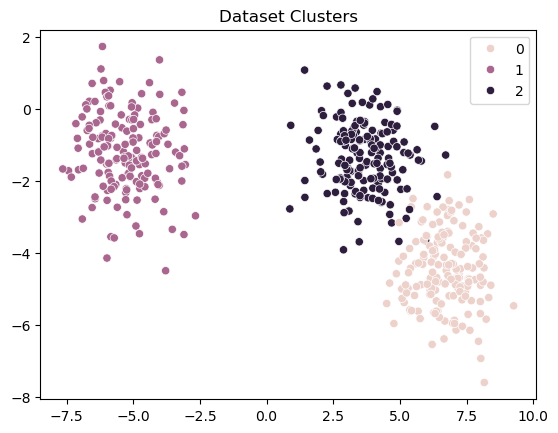

In [53]:

sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.title("Dataset Clusters")
plt.show()

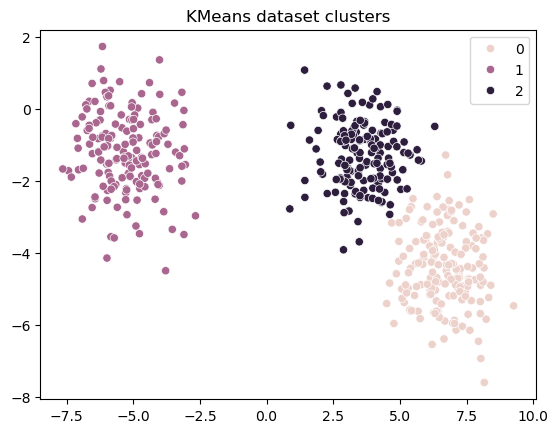

In [54]:
import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_pred)
plt.title("KMeans dataset clusters")
plt.show()